In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

## Pandas

### Importing the dataset
#### leia cada comentario e tente mentalizar o comando que faz


In [2]:
# Import marketing.csv no dataset marketing
marketing = pd.read_csv('marketing.csv')

# Print the first five rows of the DataFrame
print(marketing.head())

# Print the statistics of all columns
print(marketing.describe())

# Check column data types and non-missing values
print(marketing.info())

# Check the data type of is_retained
print(marketing['is_retained'].dtype)

# Convert is_retained to a boolean
marketing['is_retained'] = marketing['is_retained'].astype('bool')

      user_id date_served marketing_channel          variant  converted  \
0  a100004602     1/14/18         House Ads  personalization      False   
1  a100006644      1/8/18              Push  personalization      False   
2  a100003041     1/25/18         House Ads          control      False   
3  a100001238     1/16/18         Instagram          control      False   
4  a100001326     1/30/18         Instagram  personalization       True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English  19-24 years             NaN   
1            English            English    55+ years             NaN   
2            English            English  19-24 years             NaN   
3            English            English  19-24 years         1/18/18   
4            English            English  36-45 years         1/30/18   

  date_canceled subscribing_channel is_retained  
0           NaN                 NaN         NaN  
1           NaN 

### Adding new columns

In [3]:
# Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}

# Map the channel to a channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)

# Import numpy
import numpy as np

# Add the new column is_correct_lang
marketing['is_correct_lang'] = np.where(
    marketing['language_preferred'] == marketing['language_displayed'], 
    'Yes', 
    'No'
)

### Date columns

In [4]:
# Import pandas into the environment
import pandas as pd

# Import marketing.csv with date columns
marketing = pd.read_csv('marketing.csv', 
                        parse_dates = ['date_served', 'date_subscribed', 'date_canceled'])

# Add a DoW column
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek

### Daily marketing reach by channel

In [5]:
# Group by date_served and count number of unique user_id's
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

# Print head of daily_users
print(daily_users.head())

date_served
2018-01-01    43
2018-01-02    36
2018-01-03    34
2018-01-04    37
2018-01-05    28
Name: user_id, dtype: int64


### Visualizing daily marketing reach

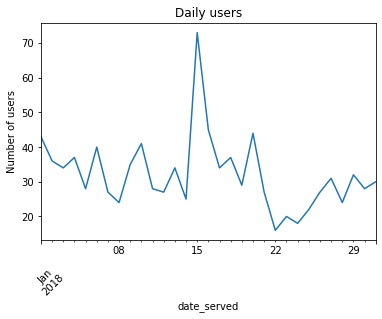

In [6]:
# Plot daily_subscribers
daily_users.plot()

# Include a title and y-axis label
plt.title('Daily users')
plt.ylabel('Number of users')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation = 45)

# Display the plot
plt.show()

## Exploratory Analysis & Summary Statistics

### Calculating conversion rate

In [7]:
# Calculate the number of people we marketed to
total = marketing['user_id'].nunique()

# Calculate the number of people who subscribed
subscribers = marketing[marketing["converted"] == True]\
                            ['user_id'].nunique()

# Calculate the conversion rate
conversion_rate = subscribers/total
print(round(conversion_rate*100, 2), "%")

8.59 %


### Calculating retention rate

In [8]:
# Calculate the number of subscribers
total_subscribers = marketing[marketing.converted == True].user_id.nunique()

# Calculate the number of people who remained subscribed
retained = marketing[marketing.is_retained == True].user_id.nunique()

# Calculate the retention rate
retention_rate = retained / total_subscribers
print(round(retention_rate*100, 2), "%")

115.66 %


### Comparing language conversion rate (I)

In [9]:
# Isolate english speakers
english_speakers = marketing[marketing['language_displayed'] == 'English']

# Calculate the total number of English speaking users
total = english_speakers.user_id.nunique()

# Calculate the number of English speakers who converted
subscribers = english_speakers[english_speakers.converted == True].user_id.nunique()

# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:', round(conversion_rate*100,2), '%')

English speaker conversion rate: 7.9 %


### Comparing language conversion rate (II)

In [10]:
# Group by language_displayed and count unique users
total = marketing.groupby('language_displayed').user_id.nunique()

# Group by language_displayed and sum conversions
subscribers = marketing[marketing.converted== True].groupby('language_displayed').user_id.nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers / total
print(language_conversion_rate)

language_displayed
Arabic     0.666667
English    0.079031
German     0.750000
Spanish         NaN
Name: user_id, dtype: float64


### Aggregating by date

In [11]:
# Group by date_served and count unique users
total = marketing.groupby('date_served').user_id.nunique()

# Group by date_served and count unique converted users
subscribers = marketing[marketing.converted == True].groupby('date_served').user_id.nunique()

# Calculate the conversion rate per day
daily_conversion_rate = subscribers/total
print(daily_conversion_rate)

date_served
2018-01-01    0.116279
2018-01-02    0.055556
2018-01-03    0.058824
2018-01-04    0.054054
2018-01-05    0.107143
2018-01-06    0.125000
2018-01-07    0.222222
2018-01-08         NaN
2018-01-09    0.085714
2018-01-10    0.097561
2018-01-11         NaN
2018-01-12    0.111111
2018-01-13    0.117647
2018-01-14    0.040000
2018-01-15    0.082192
2018-01-16    0.155556
2018-01-17    0.147059
2018-01-18    0.054054
2018-01-19    0.034483
2018-01-20    0.113636
2018-01-21    0.037037
2018-01-22    0.125000
2018-01-23    0.050000
2018-01-24    0.055556
2018-01-25    0.090909
2018-01-26    0.296296
2018-01-27         NaN
2018-01-28         NaN
2018-01-29         NaN
2018-01-30    0.035714
2018-01-31    0.033333
Name: user_id, dtype: float64


### Visualize conversion rate by language

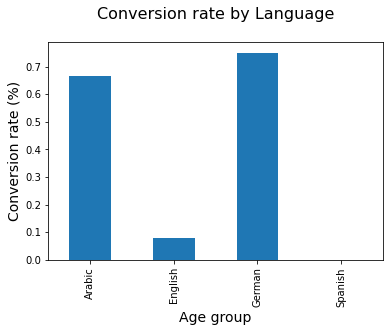

In [12]:
# Create a bar chart using language_conversion_rate DataFrame
language_conversion_rate.plot(kind = 'bar')

# Add a title and x and y-axis labels
plt.title('Conversion rate by Language\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Age group', size = 14)

# Display the plot
plt.show()

### Creating daily conversion rate DataFrame

In [13]:
# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id']\
                     .nunique()

# Group by date_served and calculate subscribers
subscribers = marketing[marketing['converted'] == True]\
                         .groupby(['date_served'])\
                         ['user_id'].nunique()

# Calculate the conversion rate for all languages
daily_conversion_rate = subscribers/total

### Setting up our data to visualize daily conversion

In [14]:
# Reset index to turn the results into a DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rate.reset_index(0))

# Rename columns
daily_conversion_rate.columns = ['date_served', 'conversion_rate']

### Visualize daily conversion rate

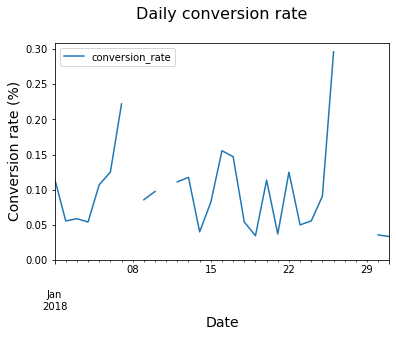

In [15]:
# Create a line chart using daily_conversion_rate DataFrame
daily_conversion_rate.plot('date_served', 
                           'conversion_rate')

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

# Set the y-axis to begin at 0
plt.ylim(0)

# Display the plot
plt.show()

### Marketing channels across age groups

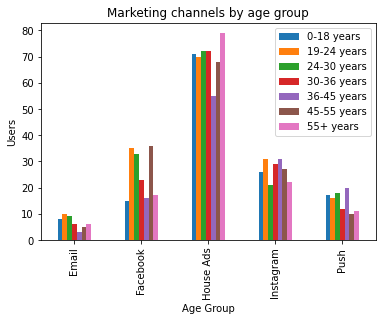

In [16]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])\
                                ['user_id'].count()

# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

# Plot the results
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
# Add a legend to the plot
plt.legend(loc = 'upper right', 
           labels = channel_age_df.columns.values)
plt.show()

### Grouping and counting by multiple columns

In [17]:
# Count the subs by subscribing channel and date subscribed
retention_total = marketing.groupby(['date_subscribed',
                                     'subscribing_channel'])\
                                       ['user_id'].nunique()

# Print results
print(retention_total.head())

date_subscribed  subscribing_channel
2018-01-01       Facebook               2
                 House Ads              1
                 Instagram              3
2018-01-02       Facebook               2
                 House Ads              1
Name: user_id, dtype: int64


In [18]:
# Sum the retained subs by subscribing channel and date subscribed
retention_subs = marketing[marketing.is_retained == True].groupby(['date_subscribed', 
                                                                   'subscribing_channel'])['user_id'].nunique()

# Print results
print(retention_subs.head())

date_subscribed  subscribing_channel
2018-01-01       Facebook               2
                 Instagram              3
2018-01-02       Facebook               2
                 House Ads              1
                 Instagram              1
Name: user_id, dtype: int64


### Analyzing retention rates for the campaign

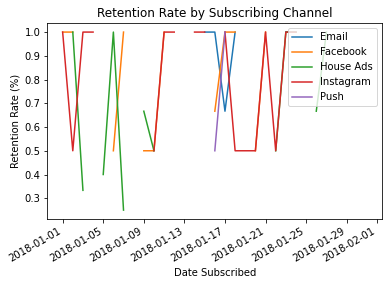

In [19]:
# Divide retained subscribers by total subscribers
retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

# Plot retention rate
retention_rate_df.plot()

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(labels = retention_rate_df.columns.values, loc = 'upper right')
plt.show()

## Conversion Attribution


### Building a conversion function

In [20]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe.converted == True].groupby(column_names).user_id.nunique()

    # Total number users
    column_total = dataframe.groupby(column_names).user_id.nunique() 
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

### Test and visualize conversion function

date_served  age_group  
2018-01-01   0-18 years     0.000000
             19-24 years    0.428571
             24-30 years    0.000000
             30-36 years    0.000000
             36-45 years    0.200000
                              ...   
2018-01-31   24-30 years    0.000000
             30-36 years    0.000000
             36-45 years    0.000000
             45-55 years    0.000000
             55+ years      0.200000
Name: user_id, Length: 214, dtype: float64


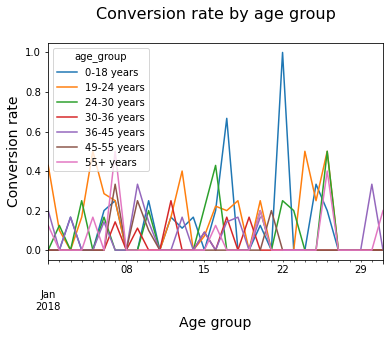

In [21]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])
print(age_group_conv)

# Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level = 1))

# Visualize conversion by age_group
age_group_df.plot()
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

### Plotting function

In [22]:
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        # Show plot
        plt.show()
        plt.clf()

### Putting it all together

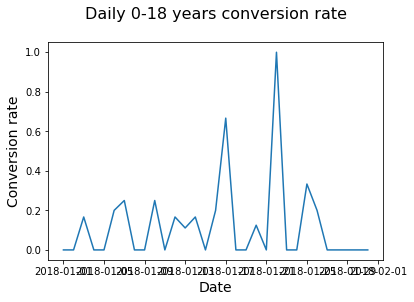

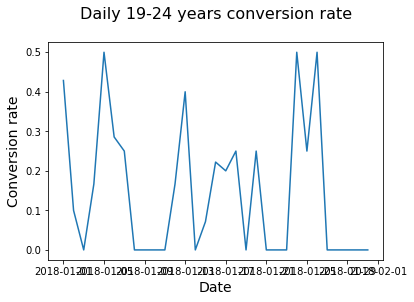

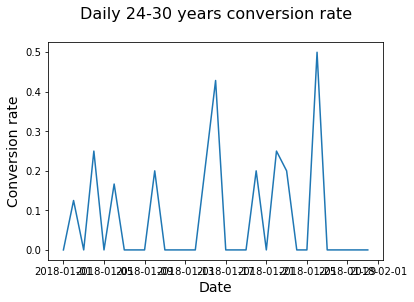

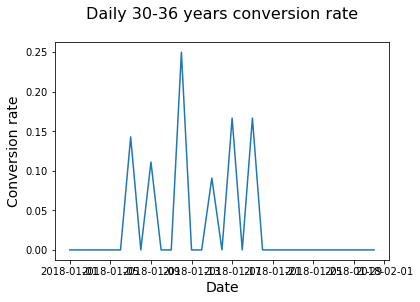

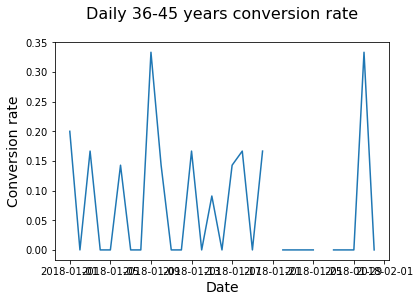

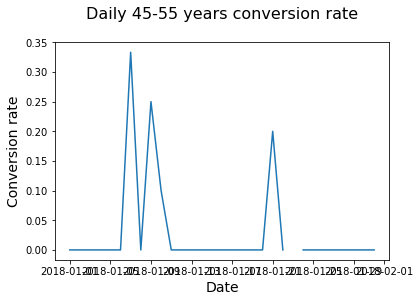

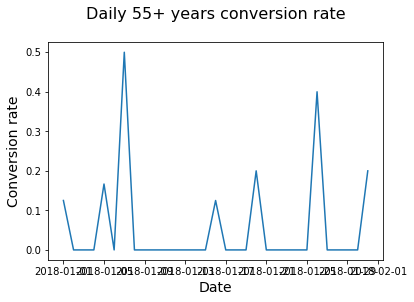

<Figure size 432x288 with 0 Axes>

In [23]:
# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(marketing, 
                                 ['date_served', 'age_group'])

# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Plot the results
plotting_conv(age_group_df)

### House ads conversion rate

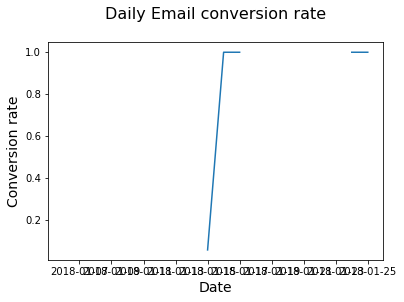

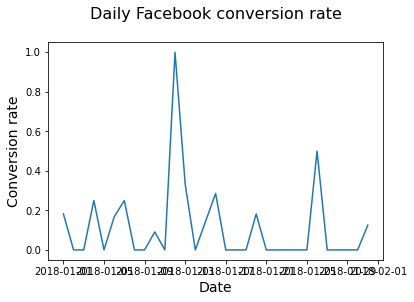

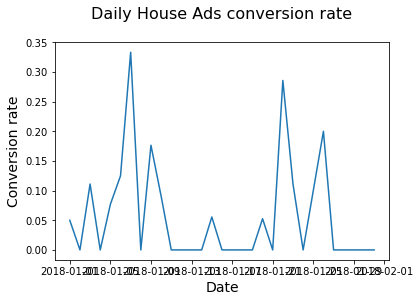

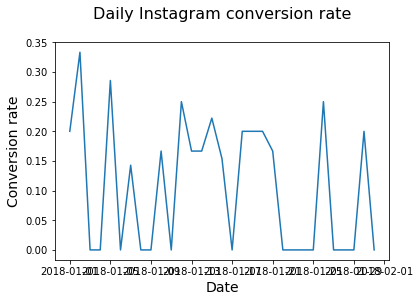

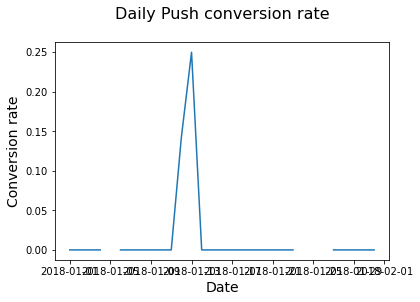

<Figure size 432x288 with 0 Axes>

In [24]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 
                                                 'marketing_channel'])

# Unstack daily_conv_channel and convert it to a DataFrame
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level = 1))

# Plot results of daily_conv_channel
plotting_conv(daily_conv_channel)

### Analyzing House ads conversion rate

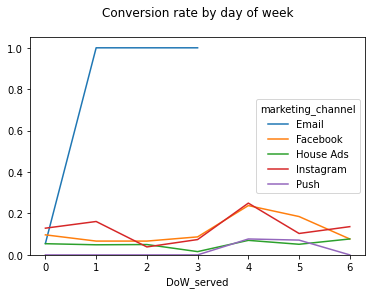

In [25]:
# Add day of week column to channel_marketing
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(marketing, ['DoW_served', 
                                             'marketing_channel'])

# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_df.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

### House ads conversion by language

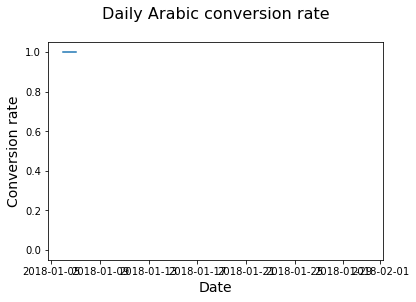

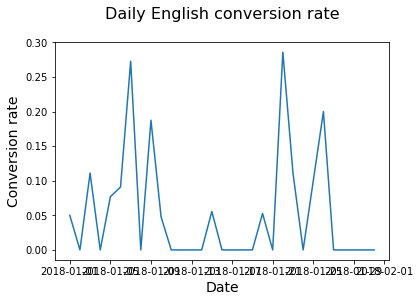

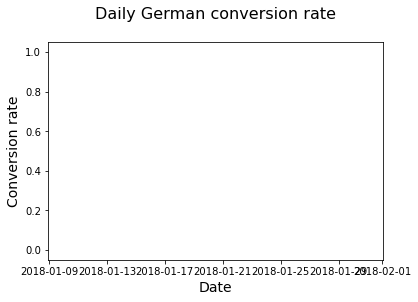

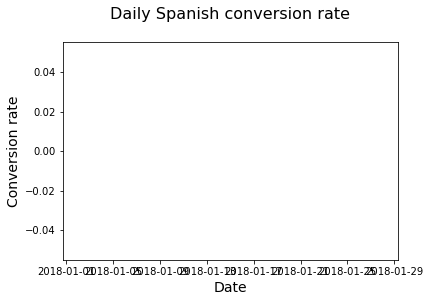

<Figure size 432x288 with 0 Axes>

In [26]:
# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing.marketing_channel == 'House Ads']

# Calculate conversion by date served, and language displayed
conv_lang_channel = conversion_rate(house_ads, ['date_served',  'language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Use your plotting function to display results
plotting_conv(conv_lang_df)

### Creating a DataFrame for house ads

In [27]:
# Add the new column is_correct_lang
house_ads['is_correct_lang'] = np.where(
    house_ads['language_preferred'] == house_ads['language_displayed'], 
    'Yes', 
    'No')

# Groupby date_served and is_correct_lang
language_check = house_ads.groupby(['date_served','is_correct_lang'])['is_correct_lang'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Print results
print(language_check_df)

is_correct_lang   No   Yes
date_served               
2018-01-01       0.0  20.0
2018-01-02       0.0  24.0
2018-01-03       0.0  19.0
2018-01-04       0.0  20.0
2018-01-05       0.0  13.0
2018-01-06       1.0  23.0
2018-01-07       0.0  12.0
2018-01-08       0.0   9.0
2018-01-09       0.0  17.0
2018-01-10       0.0  22.0
2018-01-11       1.0  12.0
2018-01-12       1.0  14.0
2018-01-13       2.0  16.0
2018-01-14       3.0   9.0
2018-01-15       0.0  18.0
2018-01-16       3.0  16.0
2018-01-17       2.0  14.0
2018-01-18       4.0  16.0
2018-01-19       2.0  12.0
2018-01-20       3.0  16.0
2018-01-21       2.0  12.0
2018-01-22       1.0   6.0
2018-01-23       2.0   7.0
2018-01-24       2.0  10.0
2018-01-25       3.0   7.0
2018-01-26       4.0  11.0
2018-01-27       1.0  16.0
2018-01-28       3.0  11.0
2018-01-29       2.0  18.0
2018-01-30       0.0  13.0
2018-01-31       0.0  12.0


C:\Users\SEGES\AppData\Local\Temp/ipykernel_2080/606452997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_ads['is_correct_lang'] = np.where(


### Confirming house ads error

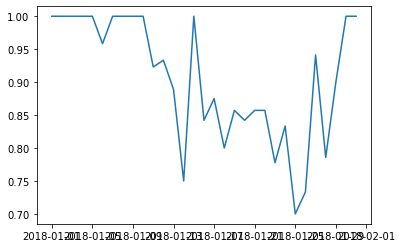

In [28]:
# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)

# Plot and show your results
plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.show()

### Setting up conversion indexes

In [29]:
# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug, ['language_displayed'])

# Index other language conversion rate against English
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

Spanish index: 0.0
Arabic index: 13.230769230769232
German index: 13.230769230769232


### Analyzing user preferences

In [30]:
# Group house_ads by date and language
converted = house_ads.groupby(['date_served', 
                          'language_preferred'])\
                        .agg({'user_id':'nunique',
                              'converted':'sum'})

# Unstack converted
converted = pd.DataFrame(converted.unstack(level=1))

### Creating a DataFrame based on indexes

In [31]:
# Create English conversion rate column for affected period
converted['english_conv_rate'] = converted.loc['2018-01-11':'2018-01-31'][('converted','English')]

# Create expected conversion rates for each language
converted['expected_spanish_rate'] = converted['english_conv_rate']*spanish_index
converted['expected_arabic_rate'] = converted['english_conv_rate']*arabic_index
converted['expected_german_rate'] = converted['english_conv_rate']*german_index

# Multiply number of users by the expected conversion rate
converted['expected_spanish_conv'] = converted['expected_spanish_rate']/100*converted[('user_id','Spanish')]
converted['expected_arabic_conv'] = converted['expected_arabic_rate']/100*converted[('user_id','Arabic')]
converted['expected_german_conv'] = converted['expected_german_rate']/100*converted[('user_id','German')]

### Assessing bug impact

In [32]:
# Use .loc to slice only the relevant dates
converted = converted.loc['2018-01-11': '2018-01-31']

# Sum expected subscribers for each language
expected_subs = converted['expected_spanish_conv'].sum() + converted['expected_arabic_conv'].sum() + converted['expected_german_conv'].sum()

# Calculate how many subscribers we actually got
actual_subs = converted['converted', 'Spanish'].sum() +converted['converted', 'Arabic'].sum() + converted['converted', 'German'].sum()

# Subtract how many subscribers we got despite the bug
lost_subs = expected_subs - actual_subs
print(lost_subs)

-2.206153846153846


## Personalization A/B Test

### Test allocation

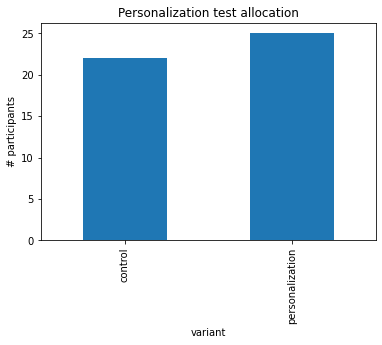

In [33]:
# Subset the DataFrame
email = marketing[marketing.marketing_channel ==  'Email']

# Group the email DataFrame by variant 
alloc = email.groupby('variant').user_id.nunique()

# Plot a bar chart of the test allocation
alloc.plot(kind = 'bar')
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

### Comparing conversion rates

In [34]:
# Group marketing by user_id and variant
subscribers = email.groupby(['user_id', 
                             'variant']).converted.max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

# Drop missing values from the control column
control = subscribers_df.control.dropna()

# Drop missing values from the personalization column
personalization = subscribers_df.personalization.dropna()

print('Control conversion rate:', control.mean())
print('Personalization conversion rate:', personalization.mean())

Control conversion rate: 0.3181818181818182
Personalization conversion rate: 0.24


### Creating a lift function

In [35]:
def lift(a,b):
    # Calcuate the mean of a and b
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean  - a_mean)/ a_mean
  
    return str(round(lift*100, 2)) + '%'
  
# Print lift() with control and personalization as inputs
print(lift(control, personalization))

-24.57%


### Evaluating statistical significance

In [36]:
from scipy import stats
stats.ttest_ind(control, personalization)

Ttest_indResult(statistic=0.5872731580065411, pvalue=0.5599555490606491)

### Building an A/B test segmenting function

In [37]:
def ab_segmentation(segment):
  # Build a for loop for each segment in marketing
    for subsegment in np.unique(marketing[segment].values):
        print(subsegment)   
            
        # Limit marketing to email and subsegment      
        email = marketing[(marketing['marketing_channel'] == 'Email') & (marketing[segment] == subsegment)]
        subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
        subscribers = pd.DataFrame(subscribers.unstack(level=1)) 
        control = subscribers['control'].dropna()
        personalization = subscribers['personalization'].dropna()

        print('lift:', lift(control, personalization))
        print('t-statistic:', stats.ttest_ind(control, personalization), '\n\n')

In [38]:
# Use ab_segmentation on age group
# ab_segmentation('age_group')